Math087 - Mathematical Modeling
===============================
[Tufts University](http://www.tufts.edu) -- [Department of Math](http://math.tufts.edu)  
[Arkadz Kirshtein](https://math.tufts.edu/people/facultyKirshtein.htm) <arkadz.kirshtein@tufts.edu>  
*Spring 2021*

*Based on materials created by James Adler and George McNinch*

Course material (Week 7): Bi-partite graphs & matching
-------------------------------------------------------

Bi-partite graphs
=================

Let $G$ be an (undirected) graph with vertex set $V$ and edge set $E$.

Suppose that we can divide the vertices into two disjoint collections --
i.e. suppose that we can represent $V$ as a *disjoint union*:

$$V = U \cup W.$$

Recall that an edge $e$ of $G$ connects two vertices: $e = [x,y]$ for
$x,y \in V$.  We say that $G$ is a *bi-partite* graph if for each edge
$e = [x,y]$, we have $x \in U$ and $y \in W$ (or vice versa). In
words, every edge connects a vertex in $U$ and a vertex in $W$.

Thus, we do not allow edges to connect a pair of vertices in $U$ or a
pair of vertices in $W$.

Matchings
=========

Let $G$ be a bi-partite graph, and suppose its vertex set $V$ is
written as a disjoint union $U \cup W$ as above.

A *matching* in $G$ is a set $M$ of edges in $E$ with the property that
no two edges in $M$ have a common vertex.

- A matching $M$ is *maximal* if $M \cup \{e\}$ is not a matching for
  any edge $e \not \in M$. 
  
  Thus $M$ is maximal if no larger set of edges is a matching.
  
- A matching $M$ has *maximum size* if there are no matchings $\tilde
  M$ in $G$ for which $|M| < |\tilde M|$ where $|X|$ denotes the
  *cardinality* of a set $X$ (i.e. $|X|$ denotes the number of
  elements in $X$, at least when $X$ is finite).
  
  Thus the matching $M$ has maximum size if there are no matchings
  with more edges.

- A matching is *perfect* if every vertex in $V$ is adjacent to one
  edge in the matching.


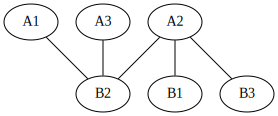

In [12]:
from graphviz import Graph

g1 = Graph()
for i in range(1,4):
    g1.node(f"A{i}")
    g1.node(f"B{i}")

g1.edge('A1','B2')
g1.edge('A2','B1')
g1.edge('A2','B2')
g1.edge('A2','B3')
g1.edge('A3','B2')
    
g1

For the graph $G$ above, we have the following:

The set $M = \{[\text{A2},\text{B2}]\}$ is a maximal matching.

The matching $N = \{[\text{A2},\text{B1}],[\text{A3},\text{B2}]\}$
  has maximal size for the graph $G$

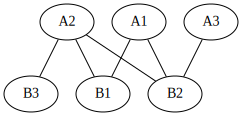

In [2]:
g2 = Graph()
for i in range(1,4):
    g2.node(f"A{i}")
    g2.node(f"B{i}")

g2.edge('A1','B1')    
g2.edge('A1','B2')
g2.edge('A2','B1')
g2.edge('A2','B2')
g2.edge('A2','B3')
g2.edge('A3','B2')
    
g2

For this graph, the matching 

$$M = \{[\text{A1},\text{B1}],[\text{A2},\text{B3}],[\text{A3},\text{B2}]\}$$

is *perfect*.



Hall’s Marriage Theorem
=========================

Let $G$ be a bipartite graph with vertex set $V$ the disjoint union $U \cup W$. Suppose that
$|U| = |W|$ is finite.

For any set of nodes $X \subset U$, let us write $N(X) \subset W$ for the *neighborhood* of $X$, i.e.

$$N(X) = \{w \in W \mid w \, \text{is adjacent to a node in $X$}\}
= \{w \in W \mid \exists e=[u,w] \in E\, \text{for some $u \in X$}\}.$$

**Theorem:** A perfect matching exists if and only if for every subset $X$ of $U$, $|X| \le |N(X)|$.

In other words, if each set of nodes in $U$ has at least as many neighbors as its size, there is guaranteed to be a perfect matching.



**Remark:** Here is a way to visualize the statement of the theorem. Consider a group of $n$ companies who are interested in hiring from a group of $n$ recent college graduates. These $2n$ entities form the vertices of a graph. All graduates will take any job, but certain companies will only hire certain graduates -- the conditions "company x will hire graduate y" determine the edges of the graph, which is bi-partite. In this setting, a perfect matching represents an hiring outcome where each graduate gets a job and each company gets an employee. 

The Theorem says that if for each $m \le n$, each collection of $m$ companies is willing to hire at least $m$ of the graduates, a perfect matching can be achieved.

You can read more about [the theorem here](https://en.wikipedia.org/wiki/Hall%27s_marriage_theorem).

Proof of the Theorem
====================

The Theorem asserts that two statements are logically equivalent - we must prove an "if and only if" statement; such statements are sometimes written symbolically using $\iff$. To prove the Theorem, we must prove that the first statement implies the second, and then that the second statement implies the first.

To do this, we first suppose that $G$ has a perfect matching (that is the first statement). We must argue that an arbitrary set of vertices satisfies the condition in the second statement. In other words, we prove the assertion $\implies$.

Let us write $M$ for a perfect matching for the graph $G$, and let $X$ be an arbitrary set of vertices in $G$.

Since $M$ is a perfect matching, for each vertex $x \in X$, there is exactly one edge $[x,v_x] \in M$ involving $x$. Moreover, $x \neq y \implies v_x \neq v_y$. Since $v_x \in N(X)$ for each $x \in X$, it is now clear that $|N(X)| \ge |X|$. We have now proved that the assertion $\implies$ is valid.


To complete the proof of the Theorem, we must now prove $\Longleftarrow$.

Thus, we suppose that $G$ satifies the condition $|N(X)| \ge |X|$ for each set of nodes $X$, and we must prove that there is a perfect matching.

Here we use the *principle of mathematical induction*.

- **base case:** 

  Suppose that $|U| = |V| = 1$. For any bipartite graph $G$ with this  property, there must be either 1 or 0 edges. Now, the assumption that $|N(X)| \ge |X|$ for any $X$ means in particular that
$|N(U)| \ge 1$ which means that the neighborhood of the vertex in $U$ is not empty -- thus, there is at least one (and hence exactly one) edge $e$ connecting the vertex in $U$ to some vertex. It is now easy to see that $M = \{e\}$ is a perfect pairing.





- **inductive hypothesis:**

  We now assume the following:
  
  whenever we are given a bi-partite graph $H$ with nodes $U_k \cup W_k$ and $|U_k| = |W_k| = k < n$, then we know the Theorem holds.
  
We must now prove the result when $|U| = |W| = n$.

Note that one of the following two possibilties must hold:

1. for every number $k$ satisfying $0 < k < n$, every set $X_k$ of $k$-vertices in $U$ satisfies $|N(X_k)| > k$.
2. for some $k$, $0 < k < n$, there is a set $X_k$ of vertices in $U$ for which $N(X_k) = k$.


Let's first consider case 1. Thus we suppose:

- for every number $k$ satisfying $0 < k < n$, every set $X_k$ of $k$-vertices in $U$ satisfies $|N(X_k)| > k$.

In this case, choose a vertex $x \in U$ and consider the subset $U' = U \setminus \{x\}$ of $U$.

Now, our assumption shows in particular that $x$ has at least one match in $W$; let's choose one and call that match $y$. Thus $[x,y]$ is an edge.

Now form $W' = W \setminus \{y\}$, and 
consider the *subgraph* $G'$ determined by the $U' \cup W'$.
The edges of the graph $G'$ are precisely the edges of $G$ not involving either $x$ or $y$.

Computing neighborhoods in $G$, our assumption means that any subset $X$ of $U'$ satisfies $|N_G(X)| > |X|$. Computing the neighborhood in $G'$ we can't lose more than one neighbor -- thus $|N_{G'}(X)| \ge |N_G(X)| - 1 \ge |X|$. 

This shows that the inductive hypothesis applies to the graph $G'$; thus $G'$ has a perfect matching $M'$, and it is easy to see that
$M = M' \cup \{[x,y]\}$ is then a perfect matching for $G$.

Now consider case 2. Thus we suppose:

- for some $k$, $0 < k < n$, there is a set $X_k$ of vertices in $U$ for which $N(X_k) = k$.

Taking $U' = X_k$ and $W' = N(X_k)$, we find a graph $G'$ having $2k$ vertices and satisfying the conditions of the inductive hypothesis. Thus, there is a perfect matching $M'$ for the graph $G'$.

Now consider the remaining $n-k$ vertices $U'' = U \setminus U'$ in $U$, and the remaining
$n-k$ vertices $W'' = W \setminus W'$ in $W$, and form the resulting graph $G''$.

We want to argue that the inductive hypothesis holds also for $G''$. Well,
if $X$ is a subset of $U''$ with $|X| = \ell$, then from the point of view of $G$,
$U' \cup X$ is a set of $k + \ell$ vertices.

The original assumption means that $N(U' \cup X)$ has at least $k+\ell$ vertices.
Notice that $N(U'\cup X) = N(U') \cup N(X)$. Since $|N(U')| = k$, it must be the case that
$N(X)$ has at least $\ell$ not contained in $N(U')$. This indeed shows that the graph $G''$ satisfies the inductive hypothesis and hence there is a perfect matching $M''$ for $G''$.



Now $M = M' \cup M''$ is a perfect matching for the original graph $G$.

The Theorem now follows by induction.

Applying Hall's Theorem
=======================

Notice that what is proved in Hall's Theorem is an *existence statement*. If we have a bi-partite graph satisfying the indicated condition, we now know that that graph has a perfect matching. But the Theorem tells us nothing about how we might *find* a perfect matching.

One way to try to find a matching is to interpret as a ``max-flow`` problem.



A new graph
-----------

Given an undirected bipartite graph $G$, and we will form a new graph $G'$ which is directed, weighted, and has one source and one terminal node.

In fact, we write $V = U \cup W$ for the vertices in $G$ as usual, and we construct the
vertex set of $G'$ as:

$$V' = V \cup \{s,t\}$$

for *new* symbols $s,t$.

Now, we require that $G'$ has a directed edge $s \to u$ for each $u \in U$, with capacity $c(s \to u) = 1$.

And we require that $G'$ has a directed edge $w \to t$ for each $w \in W$, with capacity
$c(w \to t) = 1$.

Finally, we view each edge $[u,w]$ in $G$ as a directed edge $u \to w$ in the graph $G'$
with capacity $c(u \to w) = 1$.

Interpretation of matching via max-flow
---------------------------------------

Consider the bipartite graph $G$ as before, and let $G'$ be the directed graph we have associated to it.


Theorem
-------

a. The ``max-flow`` of $G'$ is an integer, and is achieved by a flow $f$ with $f(e) \in \mathbb{Z}$ for each edge $e$ of $G'$.

b. If $G$ has a matching of size $k$, then ``max-flow`` $\ge k$.

c. If the ``max-flow`` is equal to $k$, the largest matching in $G$ involves $k$ edges.


**Proof:**

The ingegrality assertion in a) follows because $G'$ defines a "totally unimodular" linear program -- see previous notebook discussion!



For b), let $M$ be a matching of size $k$ for $G$. Consider the following assignment on the graph $G'$:

- if $[u,w]$ is in the matching $M$ for $u \in U$ and $w \in W$, set $f(s \to u) = f(u \to w) = f(w \to t) = 1$.

- set $f(e) = 0$ for all other edges in $G'$.

One readily sees that $f$ satisfies the requirements to be a flow. Moreover, by definition $|f| = k$, and hence ``max-flow`` $\ge k$.


Finally, for c), suppose that ``max-flow`` is equal to $k$, and let $f$ be a flow
with $|f| = k$. Write $\ell = $ length of the largest matching in $G$.

Let $X$ be the set of nodes in $U$ for which there is an edge $e$ with $e=[u,w]$, $u \in U$ and $f(e) \neq 0$.

The conservation laws guarantee that $M = \{e = [u,w] \mid u \in X, f(e) \neq 0\}$ defines a matching. Since $k = |M|$, it follows that $\ell \ge k$. On the other hand, b) shows that $\ell \le k$ hence equality holds. 

Model Reduction
===============

A general strategy in mathematical modeling is to replace one problem with another equivalent problem; this is known as *model reduction*.

In the present case, we can replace the problem "find the maximum matching" by a ``max-flow`` problem. We can use ``linprog`` to solve the ``max-flow`` problem. 

The ``max-flow`` value will indicate the size of a maximum matching.
If the solver gives an optimal flow with values 0 and 1, we can read off a maximum matching.

Example
--------

In the cell below, there is some code for finding the matching in a bipartite graph.

The graph should be defined by giving two lists ``U`` and ``W`` together
with a list of edges ``edges`` whose members should be tuples ``(u,w)`` with ``u`` in ``U`` and ``w`` in ``W``.

The code builds an equality constraint matrix determined by the conservation laws for the directed graph associated as above with the directed graph.

This code is used on some *randomly generated* bipartites graphs, which are constructed as follows:

```
from numpy.random import default_rng

rng = default_rng()

U = ["Alice","Bob","Cathy","Doug","Ellen","Frank"]
W = ["task 1","task 2","task 3","task 4","task 5","task 6"]

prob = .3

edges=[(x,y) for (x,y) in product(U,W) if rng.random()<prob]
```

(There is also some code for producing representations of the graphs).



In [13]:
import numpy as np
from scipy.optimize import linprog
from itertools import product

## the function find_matching defined below finds a maximal matching
## for a bi-partite graph

## the graph is given by 3 pieces of data: a set `U`, a set `W`, and a
## set `edge` of pairs (u,v) in the product U x V

## the matching is found by solving a linear program. Recall that we
## first associate a directed graph to the bi-partite graph, and solve
## the ``max-flow`` linear program for that directed graph.

def sbv(index,size):
    return np.array([1.0 if i == index else 0.0 for i in range(size)])

def to_vector(l,X):
    ## argument X is a list, and l is a list of elements from X.
    ## suppose that l=[x1,x2,...,xm] and suppose that
    ## n1,n2,...,nm are the indices of the xi in the list X.
    ## 
    ## this function returns the sum of the standard basis vectors
    ## sbv(ni,#X) for i =1,...,m
    ii = map(X.index,l)
    return sum([sbv(i,len(X)) for i in ii],np.zeros(len(X)))

def find_matching(U,W,edges):
    UW = list(product(U,W))

    edge_dict = {(u,w):True if (u,w) in edges else False for (u,w) in UW}
    
    def U_node(x):
        # compute the row-vector corresponding to the conservation law
        # for nodes in U the directed graph has an edge s -> u for
        # each u in U, and an edge w -> t for each w in W, as well as
        # the edges u->w coming from the original bi-partite graph.
        # Thus the rows of the constraint matrix for the linear program
        # have length #U + (#U)(#W) + #W
        return np.block([to_vector([x],U),
                         (-1)*to_vector([(x,w) for w in W if edge_dict[(x,w)]],UW),
                         np.zeros(len(W))])
                     

    def W_node(x):
        # compute the row-vector corresponding to the conservation law for a node in W
        # this row again has length #U + (#U)(#W) + #W.
        return np.block([np.zeros(len(U)),
                         (-1)*to_vector([(u,x) for u in U if edge_dict[(u,x)]],UW),
                         to_vector([x],W)])

    ## construct the equality constraint matrix from conservation laws
    A = np.array([U_node(x) for x in U] + [W_node(x) for x in W])

    ## construct the row for the objective function
    c = np.block([np.ones(len(U)), np.zeros(len(UW)), np.zeros(len(W))])

    lp_result = linprog((-1)*c,
                        A_eq=A,
                        b_eq=np.zeros(len(U) + len(W)),
                        bounds=(0,1),
                        method='revised simplex')

    def compare(r,targ=0,ee=1e-5):
        return True if np.abs(r-targ)<ee else False

    def extract(vec):
        pv = [vec[k + len(U)] for k in range(len(UW))]
        test = [True if compare(x,1) or compare(x,0) else False for x in pv]
        if all(test):
            match = [(u,w)  for (u,w) in UW if compare(pv[UW.index((u,w))],1)]
            return match
        else:
            raise Exception("linprog solution not of correct form.")

    match=extract(lp_result.x)
    
    if lp_result.success:
        return match
    else:
        raise Exception("linprog failed")
    

def display_matching(U,W,edges):
    UW = list(product(U,W))
    match = find_matching(U,W,edges)
    l = [f"length of matching: {len(match)}"] 
    s = [f"{u}  ---> {w}" for (u,w) in match]
    return "\n".join(l+s)



In [17]:
from numpy.random import default_rng

rng = default_rng()

U = ["Alice","Bob","Cathy","Doug","Ellen","Frank"]
W = ["task 1","task 2","task 3","task 4","task 5","task 6"]

prob = .3

edges=[(x,y) for (x,y) in product(U,W) if rng.random()<prob]

edges

[('Bob', 'task 4'),
 ('Bob', 'task 5'),
 ('Bob', 'task 6'),
 ('Cathy', 'task 1'),
 ('Cathy', 'task 6'),
 ('Doug', 'task 5'),
 ('Doug', 'task 6'),
 ('Ellen', 'task 2'),
 ('Ellen', 'task 3'),
 ('Ellen', 'task 6'),
 ('Frank', 'task 2'),
 ('Frank', 'task 4'),
 ('Frank', 'task 5'),
 ('Frank', 'task 6')]

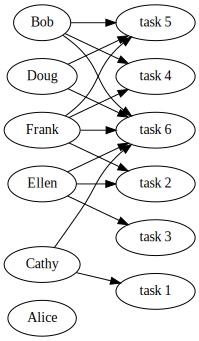

In [18]:
from graphviz import Digraph

def graph(U,W,edges):
    g = Digraph()
    g.attr(rankdir='LR')

    with g.subgraph() as c:
        c.attr(rank='same')
        for i in U:
            c.node(i)
        
    with g.subgraph() as c:
        c.attr(rank='same')
        for j in W:
            c.node(j)

    for (i,j) in product(U,W):
        if (i,j) in edges:
            g.edge(i,j)
    return g

graph(U,W,edges)

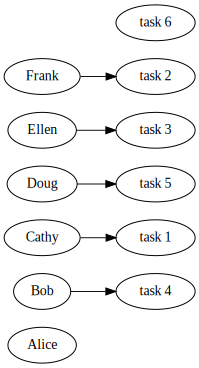

In [19]:
matches = find_matching(U,W,edges)
graph(U,W,matches)

print(display_matching(U,W,edges))

In [11]:
print(display_matching(U,W,edges))

length of matching: 5
Alice  ---> task 5
Bob  ---> task 6
Cathy  ---> task 2
Doug  ---> task 4
Ellen  ---> task 1
